 <font color='red'> NOTE: Please do not edit this file.</font> Go to <font color='white'>*File > Save a copy in Drive*</font>.

# **Course: Sistemas Inteligentes 2025**
### **Lab05: Naive Bayes y Arboles de Decisión**

---


Este es el quinto laboratorio relacionado con naive bayes y arboles de decisión para el curso **Sistemas Inteligentes 2025**.

En este notebook aprenderás el uso de los algoritmos naive bayes y arboles de decisión.

- Make a copy of this folder into your own machine and/or to your Google Drive and/or github.

In [2]:
!pip install seaborn scikit-learn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score,
                             confusion_matrix, classification_report)

# Paso 1: Cargar el conjunto de datos

In [3]:


import pandas as pd

#Accediendo al dataset existente en github
url = 'https://raw.githubusercontent.com/Anthony-ux-s/LAB05/refs/heads/main/diabetes.csv'


# Cargar el dataset
df = pd.read_csv(url) # Ruta relativa o completa en tu entorno

# Mostrar las primeras filas
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Paso 2: Exploración inicial de los datos

In [ ]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Estadísticas descriptivas
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Valores nulos
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Verificar ceros en columnas clínicas
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())


# Paso 3: Análisis de correlación

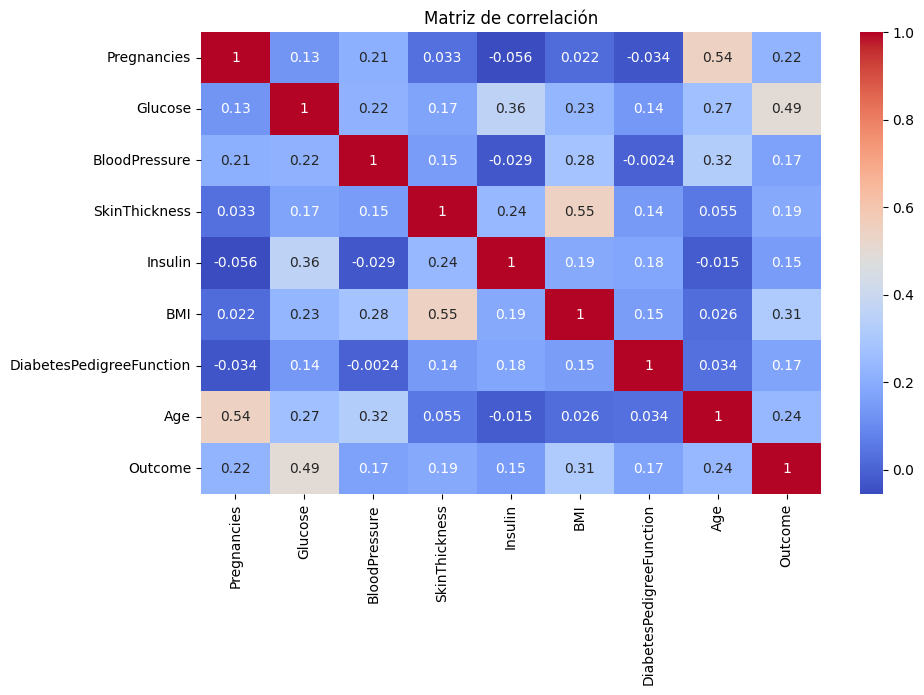

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


# Paso 4: Selección de variables y separación de datos

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# Paso 5: Entrenamiento del modelo

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


# Paso 6: Evaluación del modelo

Accuracy : 0.70
Precision: 0.58
Recall   : 0.52
F1 Score : 0.55


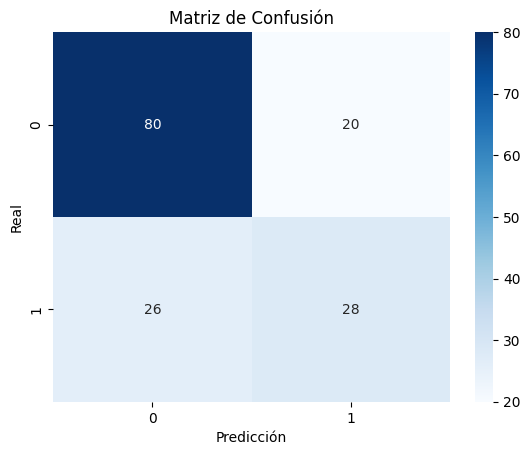

In [ ]:
# Métricas clásicas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


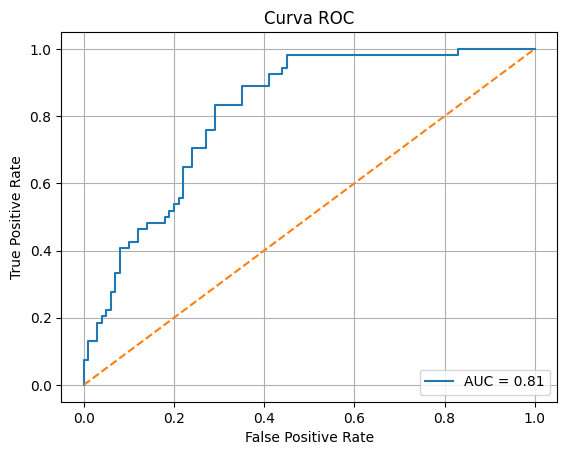

In [ ]:
# Curvas ROC Y AOC
# Calcular curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# ANALISIS DE LA EFICIENCIA DEL MODELO
print("Análisis del modelo:\n")

print(f"- Precisión general (Accuracy): {acc:.2f}")
print(f"- Capacidad de detectar positivos reales (Recall): {rec:.2f}")
print(f"- Equilibrio entre precisión y recall (F1-score): {f1:.2f}")
print(f"- Área bajo la curva ROC (AUC): {auc:.2f}")

if acc > 0.75 and auc > 0.80:
    print("\n✅ El modelo muestra un rendimiento aceptable y podría usarse como herramienta de apoyo al diagnóstico.")
elif acc > 0.65:
    print("\n⚠️ El modelo tiene rendimiento moderado. Puede mejorarse con técnicas como normalización, selección de características o modelos más complejos.")
else:
    print("\n❌ El modelo no es eficiente. No debe usarse para tomar decisiones clínicas.")


Análisis del modelo:

- Precisión general (Accuracy): 0.70
- Capacidad de detectar positivos reales (Recall): 0.52
- Equilibrio entre precisión y recall (F1-score): 0.55
- Área bajo la curva ROC (AUC): 0.81

⚠️ El modelo tiene rendimiento moderado. Puede mejorarse con técnicas como normalización, selección de características o modelos más complejos.


# Naive bayes y arboles de decisión
# Paso 9: NAIVE BAYES


=== Naive Bayes ===
              precision    recall  f1-score   support

           0     0.7789    0.7400    0.7590       100
           1     0.5593    0.6111    0.5841        54

    accuracy                         0.6948       154
   macro avg     0.6691    0.6756    0.6715       154
weighted avg     0.7019    0.6948    0.6976       154



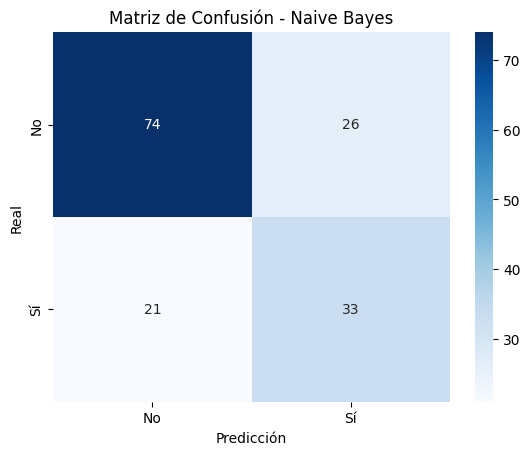

=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0     0.7248    0.7900    0.7560       100
           1     0.5333    0.4444    0.4848        54

    accuracy                         0.6688       154
   macro avg     0.6291    0.6172    0.6204       154
weighted avg     0.6576    0.6688    0.6609       154



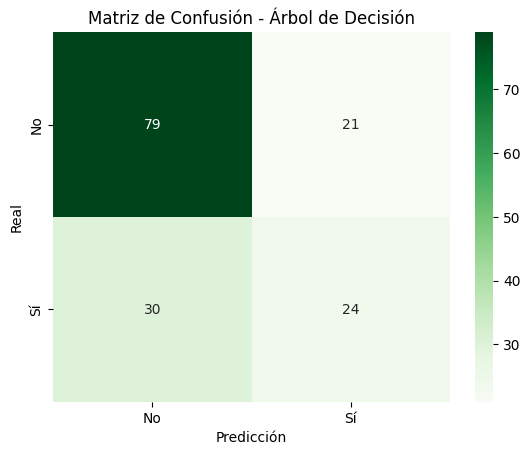

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----- Modelo 1: Naive Bayes -----
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, digits=4))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# ----- Modelo 2: Árbol de Decisión -----
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree, digits=4))

cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Curvas ROC y AUC para Naive Bayes y Árbol de Decisión

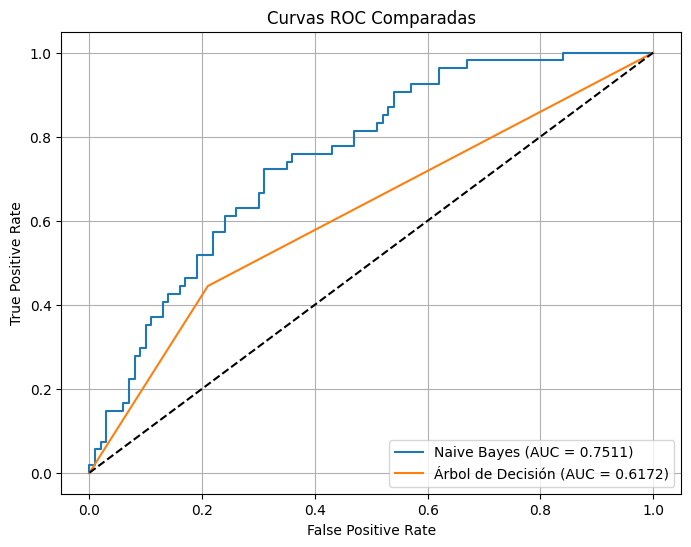

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades para el cálculo de ROC
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Calcular fpr, tpr y AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

auc_nb = roc_auc_score(y_test, y_proba_nb)
auc_tree = roc_auc_score(y_test, y_proba_tree)

# Graficar curvas ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})')
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de Decisión (AUC = {auc_tree:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC Comparadas')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Interpretando los modelos
## 🧪 Comparación de Modelos: Naive Bayes vs Árbol de Decisión

A continuación se presentan los resultados de aplicar dos modelos de clasificación (Naive Bayes y Árbol de Decisión) al dataset de diabetes. El objetivo es comparar su rendimiento utilizando métricas de evaluación estándar.

### 📊 Métricas de Desempeño

| Métrica              | Naive Bayes | Árbol de Decisión |
|----------------------|-------------|-------------------|
| Accuracy             | 69.48%      | 66.88%            |
| Precision (clase 1)  | 55.93%      | 53.33%            |
| Recall (clase 1)     | 61.11%      | 44.44%            |
| F1-score (clase 1)   | 58.41%      | 48.48%            |
| AUC-ROC              | **0.7511**  | 0.6172            |

> Nota: La clase 1 representa a los pacientes con diagnóstico de diabetes, por lo tanto es la clase positiva.

---

### 📈 Análisis de la Curva ROC

- **Naive Bayes**: Tiene una curva ROC que se aleja claramente de la diagonal aleatoria, con un área bajo la curva (AUC) de **0.7511**, lo que indica una buena capacidad para distinguir entre clases.
- **Árbol de Decisión**: Su curva ROC es más cercana a la diagonal, con un AUC de **0.6172**, indicando una capacidad de clasificación más débil.

Una AUC superior a 0.7 se considera razonablemente buena, por lo tanto el modelo Naive Bayes muestra un mejor rendimiento general.

---

### 🔍 Interpretación General

- **Naive Bayes** supera al Árbol de Decisión en todas las métricas clave: precisión, recall, F1-score, y AUC.
- Específicamente, el **recall de la clase positiva** (capacidad para detectar correctamente pacientes con diabetes) es considerablemente más alto en Naive Bayes (61.11%) en comparación con el Árbol (44.44%).
- En problemas de salud como este, un alto *recall* es crítico para minimizar los **falsos negativos** (pacientes con diabetes no detectados).

---

### ✅ Conclusión

Basado en las métricas y la curva ROC, se concluye que **Naive Bayes es el modelo más adecuado** para este conjunto de datos, al ofrecer un mejor equilibrio entre precisión y sensibilidad, especialmente en el diagnóstico correcto de pacientes con diabetes.

* Naive Bayes es preferible en este caso por su capacidad para identificar correctamente pacientes con diabetes.

* La métrica más importante aquí es el recall de la clase positiva, ya que perder un diagnóstico de diabetes es más grave que un falso positivo.

* La curva ROC apoya visualmente esta elección.


## Comparación de Criterios en Árboles de Decisión (Gini vs Entropía)

=== GINI ===
[[93  7]
 [40 14]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       100
           1       0.67      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.68      0.59      0.59       154
weighted avg       0.69      0.69      0.65       154

=== ENTROPÍA ===
[[92  8]
 [39 15]]
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       100
           1       0.65      0.28      0.39        54

    accuracy                           0.69       154
   macro avg       0.68      0.60      0.59       154
weighted avg       0.68      0.69      0.65       154



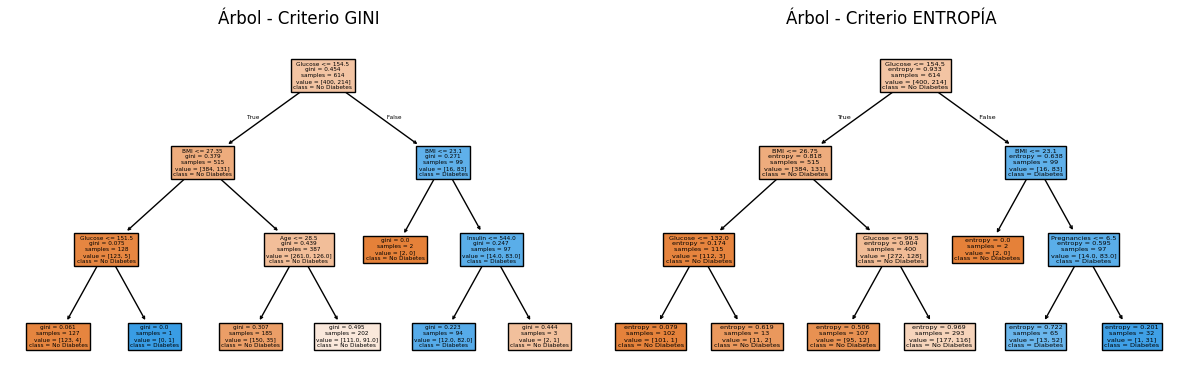

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# 3. Modelo con criterio GINI
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_gini.fit(X_train, y_train)
y_pred_gini = tree_gini.predict(X_test)

# 4. Modelo con criterio ENTROPÍA
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_entropy.fit(X_train, y_train)
y_pred_entropy = tree_entropy.predict(X_test)

# 5. Evaluación
print("=== GINI ===")
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("=== ENTROPÍA ===")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

# 6. Visualización de los árboles
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_tree(tree_gini, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Árbol - Criterio GINI")

plt.subplot(1, 2, 2)
plot_tree(tree_entropy, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Árbol - Criterio ENTROPÍA")

plt.tight_layout()
plt.show()


## Explorando el funcionamiento interno de naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv(url)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Entrenar modelo
model_nb = GaussianNB()
model_nb.fit(X, y)

# Mostrar las probabilidades previas
print("Probabilidades previas (P(Clase)):")
for i, class_prior in enumerate(model_nb.class_prior_):
    print(f"Clase {model_nb.classes_[i]}: {class_prior:.4f}")

# Mostrar medias y varianzas de cada atributo por clase
print("\nParámetros por clase (media y varianza por atributo):")
for idx, clase in enumerate(model_nb.classes_):
    print(f"\nClase {clase}:")
    for feature, mean, var in zip(X.columns, model_nb.theta_[idx], model_nb.var_[idx]):
        print(f"{feature}: media = {mean:.2f}, varianza = {var:.2f}")


Probabilidades previas (P(Clase)):
Clase 0: 0.6510
Clase 1: 0.3490

Parámetros por clase (media y varianza por atributo):

Clase 0:
Pregnancies: media = 3.30, varianza = 9.09
Glucose: media = 109.98, varianza = 682.00
BloodPressure: media = 68.18, varianza = 325.62
SkinThickness: media = 19.66, varianza = 221.27
Insulin: media = 68.79, varianza = 9754.80
BMI: media = 30.30, varianza = 59.02
DiabetesPedigreeFunction: media = 0.43, varianza = 0.09
Age: media = 31.19, varianza = 135.86

Clase 1:
Pregnancies: media = 4.87, varianza = 13.94
Glucose: media = 141.26, varianza = 1016.33
BloodPressure: media = 70.82, varianza = 460.17
SkinThickness: media = 22.16, varianza = 311.41
Insulin: media = 100.34, varianza = 19162.90
BMI: media = 35.14, varianza = 52.55
DiabetesPedigreeFunction: media = 0.55, varianza = 0.14
Age: media = 37.07, varianza = 119.85


El clasificador Naive Bayes estima la probabilidad de cada clase en función de la media y varianza de los atributos, asumiendo independencia entre ellos. Este modelo es rápido y eficiente, especialmente cuando se cumplen las suposiciones de independencia condicional. La inspección de class_prior_, theta_ y sigma_ nos permite entender cómo el modelo "aprendió" del conjunto de datos. Además, visualizar las distribuciones por clase permite verificar si la suposición de normalidad se cumple.

### Distribucion por clase

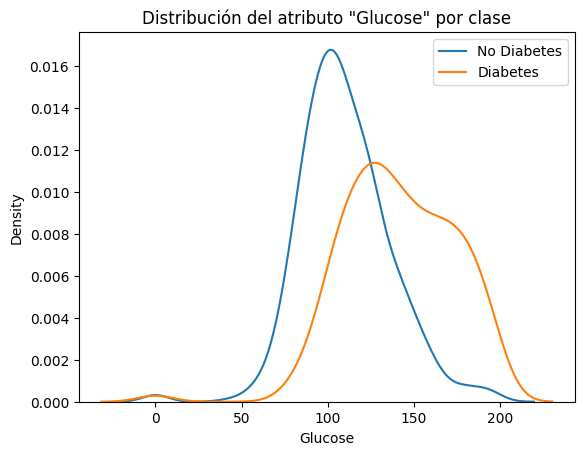

In [ ]:
import seaborn as sns

# Elegimos una característica para ilustrar
feature = 'Glucose'
sns.kdeplot(data[data['Outcome'] == 0][feature], label='No Diabetes')
sns.kdeplot(data[data['Outcome'] == 1][feature], label='Diabetes')
plt.title(f'Distribución del atributo "{feature}" por clase')
plt.xlabel(feature)
plt.legend()
plt.show()


"""
# 🧪 Práctica Calificada: Naive Bayes vs Árbol de Decisión

**Objetivo:** Aplicar técnicas avanzadas de análisis para comparar y comprender el comportamiento de los modelos Naive Bayes y Árbol de Decisión utilizando el dataset de diabetes.

---

## 🔧 Actividad 1: Evaluación con Validación Cruzada

1. Aplica validación cruzada (`cross_val_score`) con 5 y 10 particiones para ambos modelos.
2. Registra el promedio y la desviación estándar del accuracy.
3. Reflexiona:
   - ¿Cuál modelo muestra mayor estabilidad (menor varianza)?
   - ¿Existe una diferencia significativa frente al testeo con conjunto separado?

---

## ⚙️ Actividad 2: Ajuste de Hiperparámetros

**Para Árbol de Decisión:**

1. Crea modelos variando:
   - `max_depth`: por ejemplo, 3, 5, 10
   - `criterion`: `'gini'` y `'entropy'`
2. Evalúa con accuracy, F1-score y AUC.
3. Reflexiona:
   - ¿Qué combinación ofrece mejor rendimiento?
   - ¿Se observan señales de sobreajuste (overfitting)?

---

## 🧮 Actividad 3: Exploración del Umbral de Clasificación

1. Usa `.predict_proba()` para obtener probabilidades de predicción.
2. Prueba con distintos umbrales de decisión: 0.3, 0.5 y 0.7.
3. Calcula y grafica:
   - Precisión
   - Recall
   - F1-score
4. Reflexiona:
   - ¿Cuál umbral es más apropiado para una aplicación médica?

---

## 🔍 Actividad 4: Análisis de Importancia de Atributos

**Para Árbol de Decisión:**

1. Extrae la importancia de atributos (`model.feature_importances_`).
2. Visualiza con un gráfico de barras.
3. Reflexiona:
   - ¿Qué variables influyen más en las decisiones del modelo?

**Para Naive Bayes:**

1. Muestra las medias (`theta_`) y varianzas (`var_`) de cada atributo por clase.
2. Reflexiona:
   - ¿Qué atributos muestran mayor diferencia entre clases?

---
## 📊 Actividad 6: Informe Final

Redacta un informe breve en el que:
- Elección justificada del mejor modelo
- Análisis de errores (¿dónde falla el modelo?)
- Posibles mejoras (feature selection, balanceo de clases, etc.)
- Expliques cuál modelo es más adecuado en un contexto clínico.
"""


# INFORME PARA PRESENTAR
En un archivo pdf se presenta:
- Link del colab
- Pdf del colab con el detalle de las actividades realizadas, explicando cada accion realizada (si no lo adjuntan no se califica).
- La actividad 6

## ACTIVIDAD 1 : Evaluación con Validación Cruzada
## PASO 1 : Importar las librerías necesarias

In [ ]:
# Importamos todas las librerías que necesitaremos para la Actividad 1
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## PASO 2: Preparamos los datos

In [ ]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

# Separar variables independientes (X) y dependiente (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("✅ Datos cargados y preprocesados")
print(f"Forma del dataset: {X.shape}")

✅ Datos cargados y preprocesados
Forma del dataset: (768, 8)


## Crear los modelos

In [ ]:
# Definimos los dos modelos que vamos a comparar
modelo_nb = GaussianNB()
modelo_tree = DecisionTreeClassifier(random_state=42)

print("- Naive Bayes (GaussianNB)")
print("- Árbol de Decisión (DecisionTreeClassifier)")

✅ Modelos creados:
- Naive Bayes (GaussianNB)
- Árbol de Decisión (DecisionTreeClassifier)


## Validación cruzada con 5 particiones

In [ ]:
print(" validación cruzada con 5 particiones...")
print("="*50)

# Validación cruzada para Naive Bayes (5-fold)
scores_nb_5 = cross_val_score(modelo_nb, X, y, cv=5, scoring='accuracy')
mean_nb_5 = scores_nb_5.mean()
std_nb_5 = scores_nb_5.std()

# Validación cruzada para Árbol de Decisión (5-fold)
scores_tree_5 = cross_val_score(modelo_tree, X, y, cv=5, scoring='accuracy')
mean_tree_5 = scores_tree_5.mean()
std_tree_5 = scores_tree_5.std()

# Mostrar resultados
print("NAIVE BAYES (5-fold):")
print(f"  Scores: {scores_nb_5}")
print(f"  Promedio: {mean_nb_5:.4f}")
print(f"  Desviación estándar: {std_nb_5:.4f}")

print("\nÁRBOL DE DECISIÓN (5-fold):")
print(f"  Scores: {scores_tree_5}")
print(f"  Promedio: {mean_tree_5:.4f}")
print(f"  Desviación estándar: {std_tree_5:.4f}")

🔄 Ejecutando validación cruzada con 5 particiones...
NAIVE BAYES (5-fold):
  Scores: [0.74675325 0.72077922 0.75324675 0.79738562 0.74509804]
  Promedio: 0.7527
  Desviación estándar: 0.0249

ÁRBOL DE DECISIÓN (5-fold):
  Scores: [0.69480519 0.66883117 0.66883117 0.77777778 0.71895425]
  Promedio: 0.7058
  Desviación estándar: 0.0405


## Validación cruzada con 10 particiones

In [ ]:
print("\nvalidación cruzada con 10 particiones...")
print("="*50)

# Validación cruzada para Naive Bayes (10-fold)
scores_nb_10 = cross_val_score(modelo_nb, X, y, cv=10, scoring='accuracy')
mean_nb_10 = scores_nb_10.mean()
std_nb_10 = scores_nb_10.std()

# Validación cruzada para Árbol de Decisión (10-fold)
scores_tree_10 = cross_val_score(modelo_tree, X, y, cv=10, scoring='accuracy')
mean_tree_10 = scores_tree_10.mean()
std_tree_10 = scores_tree_10.std()

# Mostrar resultados
print("NAIVE BAYES (10-fold):")
print(f"  Scores: {scores_nb_10}")
print(f"  Promedio: {mean_nb_10:.4f}")
print(f"  Desviación estándar: {std_nb_10:.4f}")

print("\nÁRBOL DE DECISIÓN (10-fold):")
print(f"  Scores: {scores_tree_10}")
print(f"  Promedio: {mean_tree_10:.4f}")
print(f"  Desviación estándar: {std_tree_10:.4f}")


validación cruzada con 10 particiones...
NAIVE BAYES (10-fold):
  Scores: [0.75324675 0.72727273 0.74025974 0.68831169 0.71428571 0.77922078
 0.74025974 0.83116883 0.71052632 0.77631579]
  Promedio: 0.7461
  Desviación estándar: 0.0392

ÁRBOL DE DECISIÓN (10-fold):
  Scores: [0.5974026  0.74025974 0.64935065 0.61038961 0.62337662 0.66233766
 0.80519481 0.71428571 0.61842105 0.71052632]
  Promedio: 0.6732
  Desviación estándar: 0.0639


## Crear tabla comparativa

In [ ]:
# Crear una tabla resumen de todos los resultados
import pandas as pd

resultados = {
    'Modelo': ['Naive Bayes', 'Naive Bayes', 'Árbol Decisión', 'Árbol Decisión'],
    'Validación': ['5-fold', '10-fold', '5-fold', '10-fold'],
    'Promedio': [mean_nb_5, mean_nb_10, mean_tree_5, mean_tree_10],
    'Desv. Estándar': [std_nb_5, std_nb_10, std_tree_5, std_tree_10],
    'Estabilidad': [
        'Alta' if std_nb_5 < 0.05 else 'Media' if std_nb_5 < 0.10 else 'Baja',
        'Alta' if std_nb_10 < 0.05 else 'Media' if std_nb_10 < 0.10 else 'Baja',
        'Alta' if std_tree_5 < 0.05 else 'Media' if std_tree_5 < 0.10 else 'Baja',
        'Alta' if std_tree_10 < 0.05 else 'Media' if std_tree_10 < 0.10 else 'Baja'
    ]
}

df_resultados = pd.DataFrame(resultados)
print("\n📊 TABLA COMPARATIVA DE RESULTADOS")
print("="*50)
print(df_resultados.to_string(index=False))


📊 TABLA COMPARATIVA DE RESULTADOS
        Modelo Validación  Promedio  Desv. Estándar Estabilidad
   Naive Bayes     5-fold  0.752653        0.024937        Alta
   Naive Bayes    10-fold  0.746087        0.039163        Alta
Árbol Decisión     5-fold  0.705840        0.040517        Alta
Árbol Decisión    10-fold  0.673154        0.063923       Media


##  Visualización con gráficos

<ipython-input-27-2705959582>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([scores_nb_5, scores_tree_5],
<ipython-input-27-2705959582>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([scores_nb_10, scores_tree_10],


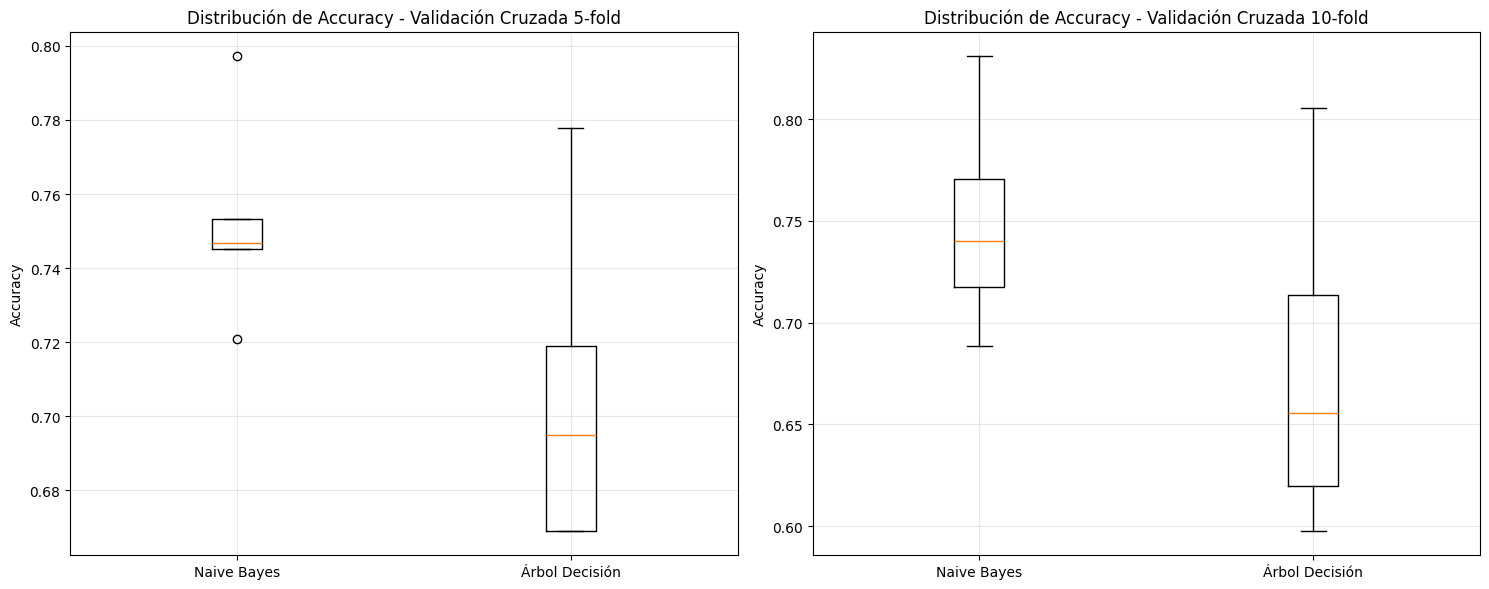

In [ ]:
# Crear gráficos para comparar visualmente
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Validación cruzada 5-fold
axes[0].boxplot([scores_nb_5, scores_tree_5],
                labels=['Naive Bayes', 'Árbol Decisión'])
axes[0].set_title('Distribución de Accuracy - Validación Cruzada 5-fold')
axes[0].set_ylabel('Accuracy')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Validación cruzada 10-fold
axes[1].boxplot([scores_nb_10, scores_tree_10],
                labels=['Naive Bayes', 'Árbol Decisión'])
axes[1].set_title('Distribución de Accuracy - Validación Cruzada 10-fold')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis y reflexion

In [ ]:
print("\n🤔 ANÁLISIS Y REFLEXIONES")
print("="*60)

# Primero, recordemos los resultados del conjunto separado del lab original
# (Estos son los valores que obtuviste en tu lab original)
print("📋 COMPARACIÓN CON RESULTADOS ANTERIORES:")
print("   Resultados del conjunto de prueba separado (del lab original):")
print("   - Naive Bayes: ~69.48% accuracy")
print("   - Árbol de Decisión: ~66.88% accuracy")

print(f"\n📊 RESULTADOS DE VALIDACIÓN CRUZADA:")
print(f"   Naive Bayes 5-fold: {mean_nb_5:.4f} ± {std_nb_5:.4f}")
print(f"   Naive Bayes 10-fold: {mean_nb_10:.4f} ± {std_nb_10:.4f}")
print(f"   Árbol Decisión 5-fold: {mean_tree_5:.4f} ± {std_tree_5:.4f}")
print(f"   Árbol Decisión 10-fold: {mean_tree_10:.4f} ± {std_tree_10:.4f}")

print("\n" + "="*60)
print("RESPUESTAS A LAS PREGUNTAS CLAVE:")
print("="*60)

# PREGUNTA 1: ¿Cuál modelo muestra mayor estabilidad (menor varianza)?
print("\n❓ PREGUNTA 1: ¿Cuál modelo muestra mayor estabilidad (menor varianza)?")
print("-" * 70)

# Comparar desviaciones estándar
estabilidad_5fold = "Naive Bayes" if std_nb_5 < std_tree_5 else "Árbol de Decisión"
estabilidad_10fold = "Naive Bayes" if std_nb_10 < std_tree_10 else "Árbol de Decisión"

print("📈 ANÁLISIS DE ESTABILIDAD (menor σ = más estable):")
print(f"   5-fold CV:")
print(f"     • Naive Bayes: σ = {std_nb_5:.4f}")
print(f"     • Árbol Decisión: σ = {std_tree_5:.4f}")
print(f"     → MÁS ESTABLE: {estabilidad_5fold}")

print(f"   10-fold CV:")
print(f"     • Naive Bayes: σ = {std_nb_10:.4f}")
print(f"     • Árbol Decisión: σ = {std_tree_10:.4f}")
print(f"     → MÁS ESTABLE: {estabilidad_10fold}")

# Determinar ganador general
if (std_nb_5 + std_nb_10) < (std_tree_5 + std_tree_10):
    modelo_mas_estable = "Naive Bayes"
    razon_estabilidad = "menores desviaciones estándar en ambas validaciones"
else:
    modelo_mas_estable = "Árbol de Decisión"
    razon_estabilidad = "menores desviaciones estándar en ambas validaciones"

print(f"\n🏆 CONCLUSIÓN ESTABILIDAD:")
print(f"   {modelo_mas_estable} muestra MAYOR ESTABILIDAD debido a {razon_estabilidad}")

# Interpretación de estabilidad
print(f"\n💡 INTERPRETACIÓN:")
if max(std_nb_5, std_nb_10, std_tree_5, std_tree_10) < 0.05:
    print("   • Ambos modelos muestran ALTA estabilidad (σ < 0.05)")
elif max(std_nb_5, std_nb_10, std_tree_5, std_tree_10) < 0.10:
    print("   • Los modelos muestran estabilidad MODERADA (0.05 ≤ σ < 0.10)")
else:
    print("   • Hay indicios de BAJA estabilidad en algunos casos (σ ≥ 0.10)")

# PREGUNTA 2: ¿Existe diferencia significativa frente al testeo con conjunto separado?
print("\n❓ PREGUNTA 2: ¿Existe diferencia significativa frente al testeo con conjunto separado?")
print("-" * 70)

# Valores aproximados del lab original (ajusta estos valores según tus resultados reales)
accuracy_nb_original = 0.6948  # 69.48%
accuracy_tree_original = 0.6688  # 66.88%

print("🔍 COMPARACIÓN DETALLADA:")
print(f"   Naive Bayes:")
print(f"     • Conjunto separado: {accuracy_nb_original:.4f}")
print(f"     • CV 5-fold:         {mean_nb_5:.4f}")
print(f"     • CV 10-fold:        {mean_nb_10:.4f}")

diff_nb_5 = abs(mean_nb_5 - accuracy_nb_original)
diff_nb_10 = abs(mean_nb_10 - accuracy_nb_original)

print(f"     • Diferencia con 5-fold:  {diff_nb_5:.4f}")
print(f"     • Diferencia con 10-fold: {diff_nb_10:.4f}")

print(f"\n   Árbol de Decisión:")
print(f"     • Conjunto separado: {accuracy_tree_original:.4f}")
print(f"     • CV 5-fold:         {mean_tree_5:.4f}")
print(f"     • CV 10-fold:        {mean_tree_10:.4f}")

diff_tree_5 = abs(mean_tree_5 - accuracy_tree_original)
diff_tree_10 = abs(mean_tree_10 - accuracy_tree_original)

print(f"     • Diferencia con 5-fold:  {diff_tree_5:.4f}")
print(f"     • Diferencia con 10-fold: {diff_tree_10:.4f}")

# Determinar si hay diferencias significativas
umbral_significativo = 0.05  # 5% de diferencia

print(f"\n📊 EVALUACIÓN DE DIFERENCIAS (umbral significativo: {umbral_significativo:.2f}):")

if diff_nb_5 > umbral_significativo or diff_nb_10 > umbral_significativo:
    print("   ⚠️  Naive Bayes: SÍ hay diferencias significativas")
else:
    print("   ✅ Naive Bayes: NO hay diferencias significativas")

if diff_tree_5 > umbral_significativo or diff_tree_10 > umbral_significativo:
    print("   ⚠️  Árbol de Decisión: SÍ hay diferencias significativas")
else:
    print("   ✅ Árbol de Decisión: NO hay diferencias significativas")

print(f"\n🎯 CONCLUSIÓN GENERAL:")
max_diff = max(diff_nb_5, diff_nb_10, diff_tree_5, diff_tree_10)
if max_diff < 0.03:
    print("   • Los resultados son MUY CONSISTENTES entre métodos de validación")
    print("   • La validación cruzada confirma los resultados del conjunto separado")
elif max_diff < 0.05:
    print("   • Los resultados son CONSISTENTES entre métodos de validación")
    print("   • Pequeñas variaciones son normales y aceptables")
else:
    print("   • Existen DIFERENCIAS NOTABLES entre métodos de validación")
    print("   • La validación cruzada proporciona una estimación más robusta")

print(f"\n💭 REFLEXIONES FINALES:")
print("   1. La validación cruzada usa TODOS los datos para entrenar y validar")
print("   2. Reduce el sesgo de una división particular de datos")
print("   3. Proporciona intervalos de confianza más realistas")
print("   4. Es más robusta para datasets pequeños como este (768 muestras)")

# Recomendación final
if modelo_mas_estable == "Naive Bayes":
    print(f"\n🏆 RECOMENDACIÓN: Usar {modelo_mas_estable} por su mayor estabilidad y consistencia")
else:
    print(f"\n🏆 RECOMENDACIÓN: Considerar {modelo_mas_estable} por su estabilidad")


🤔 ANÁLISIS Y REFLEXIONES
📋 COMPARACIÓN CON RESULTADOS ANTERIORES:
   Resultados del conjunto de prueba separado (del lab original):
   - Naive Bayes: ~69.48% accuracy
   - Árbol de Decisión: ~66.88% accuracy

📊 RESULTADOS DE VALIDACIÓN CRUZADA:
   Naive Bayes 5-fold: 0.7527 ± 0.0249
   Naive Bayes 10-fold: 0.7461 ± 0.0392
   Árbol Decisión 5-fold: 0.7058 ± 0.0405
   Árbol Decisión 10-fold: 0.6732 ± 0.0639

RESPUESTAS A LAS PREGUNTAS CLAVE:

❓ PREGUNTA 1: ¿Cuál modelo muestra mayor estabilidad (menor varianza)?
----------------------------------------------------------------------
📈 ANÁLISIS DE ESTABILIDAD (menor σ = más estable):
   5-fold CV:
     • Naive Bayes: σ = 0.0249
     • Árbol Decisión: σ = 0.0405
     → MÁS ESTABLE: Naive Bayes
   10-fold CV:
     • Naive Bayes: σ = 0.0392
     • Árbol Decisión: σ = 0.0639
     → MÁS ESTABLE: Naive Bayes

🏆 CONCLUSIÓN ESTABILIDAD:
   Naive Bayes muestra MAYOR ESTABILIDAD debido a menores desviaciones estándar en ambas validaciones

💡 INTERP

## Actividad 2: Ajuste de Hiperparámetros


## Importar librerías adicionales

In [ ]:
# Importamos librerías adicionales para esta actividad
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import itertools



## Definir los hiperparámetros a probar

In [ ]:
# Definimos los valores de hiperparámetros que vamos a probar
max_depth_values = [3, 5, 10]
criterion_values = ['gini', 'entropy']

print("🔧 HIPERPARÁMETROS A EVALUAR:")
print(f"   max_depth: {max_depth_values}")
print(f"   criterion: {criterion_values}")
print(f"   Total de combinaciones: {len(max_depth_values) * len(criterion_values)}")

# Crear todas las combinaciones posibles
combinaciones = list(itertools.product(max_depth_values, criterion_values))
print(f"\n📝 COMBINACIONES A PROBAR:")
for i, (depth, crit) in enumerate(combinaciones, 1):
    print(f"   {i}. max_depth={depth}, criterion='{crit}'")

🔧 HIPERPARÁMETROS A EVALUAR:
   max_depth: [3, 5, 10]
   criterion: ['gini', 'entropy']
   Total de combinaciones: 6

📝 COMBINACIONES A PROBAR:
   1. max_depth=3, criterion='gini'
   2. max_depth=3, criterion='entropy'
   3. max_depth=5, criterion='gini'
   4. max_depth=5, criterion='entropy'
   5. max_depth=10, criterion='gini'
   6. max_depth=10, criterion='entropy'


## Función para evaluar modelos


In [ ]:
def evaluar_modelo_arbol(X, y, max_depth, criterion, cv=5):
    """
    Evalúa un árbol de decisión con parámetros específicos
    usando validación cruzada
    """
    # Crear el modelo con los parámetros especificados
    modelo = DecisionTreeClassifier(
        max_depth=max_depth,
        criterion=criterion,
        random_state=42
    )

    # Calcular métricas usando validación cruzada
    accuracy_scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(modelo, X, y, cv=cv, scoring='f1')
    auc_scores = cross_val_score(modelo, X, y, cv=cv, scoring='roc_auc')

    # Calcular promedios y desviaciones
    resultados = {
        'max_depth': max_depth,
        'criterion': criterion,
        'accuracy_mean': accuracy_scores.mean(),
        'accuracy_std': accuracy_scores.std(),
        'f1_mean': f1_scores.mean(),
        'f1_std': f1_scores.std(),
        'auc_mean': auc_scores.mean(),
        'auc_std': auc_scores.std()
    }

    return resultados

print("✅ Función de evaluación creada")

✅ Función de evaluación creada


## Evaluar todas las combinaciones

In [ ]:
print("\n🔄 EVALUANDO TODAS LAS COMBINACIONES...")
print("="*70)

# Lista para almacenar todos los resultados
resultados_completos = []

# Evaluar cada combinación
for i, (depth, crit) in enumerate(combinaciones, 1):
    print(f"\n🧪 Evaluando combinación {i}/6: max_depth={depth}, criterion='{crit}'")

    # Evaluar el modelo
    resultado = evaluar_modelo_arbol(X, y, depth, crit)
    resultados_completos.append(resultado)

    # Mostrar resultados inmediatos
    print(f"   Accuracy: {resultado['accuracy_mean']:.4f} ± {resultado['accuracy_std']:.4f}")
    print(f"   F1-Score: {resultado['f1_mean']:.4f} ± {resultado['f1_std']:.4f}")
    print(f"   AUC:      {resultado['auc_mean']:.4f} ± {resultado['auc_std']:.4f}")

print("\n✅ Evaluación completada para todas las combinaciones")


🔄 EVALUANDO TODAS LAS COMBINACIONES...

🧪 Evaluando combinación 1/6: max_depth=3, criterion='gini'
   Accuracy: 0.7279 ± 0.0106
   F1-Score: 0.5237 ± 0.0762
   AUC:      0.7752 ± 0.0323

🧪 Evaluando combinación 2/6: max_depth=3, criterion='entropy'
   Accuracy: 0.7344 ± 0.0120
   F1-Score: 0.5405 ± 0.0314
   AUC:      0.7798 ± 0.0449

🧪 Evaluando combinación 3/6: max_depth=5, criterion='gini'
   Accuracy: 0.7475 ± 0.0369
   F1-Score: 0.6312 ± 0.0477
   AUC:      0.7818 ± 0.0393

🧪 Evaluando combinación 4/6: max_depth=5, criterion='entropy'
   Accuracy: 0.7383 ± 0.0380
   F1-Score: 0.6272 ± 0.0314
   AUC:      0.7774 ± 0.0431

🧪 Evaluando combinación 5/6: max_depth=10, criterion='gini'
   Accuracy: 0.7019 ± 0.0271
   F1-Score: 0.5635 ± 0.0378
   AUC:      0.6866 ± 0.0350

🧪 Evaluando combinación 6/6: max_depth=10, criterion='entropy'
   Accuracy: 0.7006 ± 0.0489
   F1-Score: 0.5514 ± 0.0450
   AUC:      0.6709 ± 0.0390

✅ Evaluación completada para todas las combinaciones


##  Crear tabla comparativa detallada

In [ ]:
# Crear DataFrame con todos los resultados
df_resultados = pd.DataFrame(resultados_completos)

# Ordenar por AUC (métrica más importante para este problema)
df_resultados_ordenado = df_resultados.sort_values('auc_mean', ascending=False)

print("\n📊 TABLA COMPARATIVA COMPLETA (ordenada por AUC)")
print("="*80)
print(df_resultados_ordenado.round(4).to_string(index=False))

# Mostrar top 3 configuraciones
print(f"\n🏆 TOP 3 MEJORES CONFIGURACIONES (por AUC):")
print("-"*50)
for i in range(min(3, len(df_resultados_ordenado))):
    row = df_resultados_ordenado.iloc[i]
    print(f"{i+1}. max_depth={row['max_depth']}, criterion='{row['criterion']}'")
    print(f"   AUC: {row['auc_mean']:.4f} ± {row['auc_std']:.4f}")
    print(f"   F1:  {row['f1_mean']:.4f} ± {row['f1_std']:.4f}")
    print(f"   Acc: {row['accuracy_mean']:.4f} ± {row['accuracy_std']:.4f}")
    print()


📊 TABLA COMPARATIVA COMPLETA (ordenada por AUC)
 max_depth criterion  accuracy_mean  accuracy_std  f1_mean  f1_std  auc_mean  auc_std
         5      gini         0.7475        0.0369   0.6312  0.0477    0.7818   0.0393
         3   entropy         0.7344        0.0120   0.5405  0.0314    0.7798   0.0449
         5   entropy         0.7383        0.0380   0.6272  0.0314    0.7774   0.0431
         3      gini         0.7279        0.0106   0.5237  0.0762    0.7752   0.0323
        10      gini         0.7019        0.0271   0.5635  0.0378    0.6866   0.0350
        10   entropy         0.7006        0.0489   0.5514  0.0450    0.6709   0.0390

🏆 TOP 3 MEJORES CONFIGURACIONES (por AUC):
--------------------------------------------------
1. max_depth=5, criterion='gini'
   AUC: 0.7818 ± 0.0393
   F1:  0.6312 ± 0.0477
   Acc: 0.7475 ± 0.0369

2. max_depth=3, criterion='entropy'
   AUC: 0.7798 ± 0.0449
   F1:  0.5405 ± 0.0314
   Acc: 0.7344 ± 0.0120

3. max_depth=5, criterion='entropy'
   

##Visualización de resultados

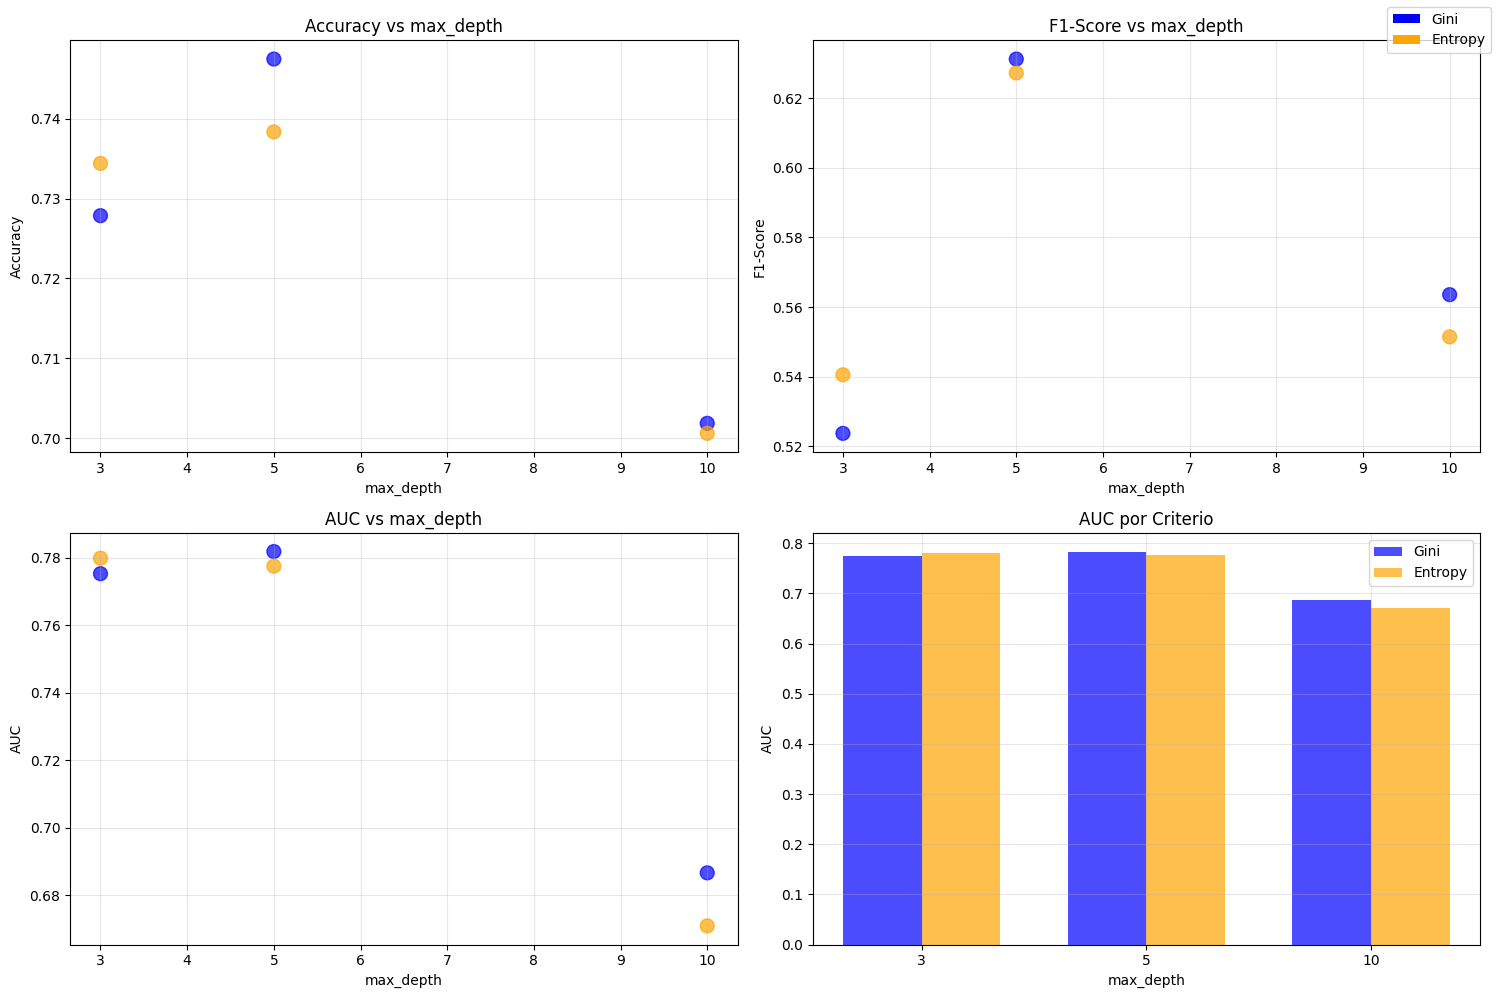

In [ ]:
# Crear gráficos para visualizar los resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Preparar datos para visualización
depths = df_resultados['max_depth'].values
criteria = df_resultados['criterion'].values
colors = ['blue' if c == 'gini' else 'orange' for c in criteria]

# Gráfico 1: Accuracy vs max_depth
axes[0,0].scatter(depths, df_resultados['accuracy_mean'], c=colors, s=100, alpha=0.7)
axes[0,0].set_xlabel('max_depth')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Accuracy vs max_depth')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: F1-Score vs max_depth
axes[0,1].scatter(depths, df_resultados['f1_mean'], c=colors, s=100, alpha=0.7)
axes[0,1].set_xlabel('max_depth')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].set_title('F1-Score vs max_depth')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: AUC vs max_depth
axes[1,0].scatter(depths, df_resultados['auc_mean'], c=colors, s=100, alpha=0.7)
axes[1,0].set_xlabel('max_depth')
axes[1,0].set_ylabel('AUC')
axes[1,0].set_title('AUC vs max_depth')
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Comparación por criterio
gini_data = df_resultados[df_resultados['criterion'] == 'gini']
entropy_data = df_resultados[df_resultados['criterion'] == 'entropy']

x_pos = range(len(max_depth_values))
width = 0.35

axes[1,1].bar([x - width/2 for x in x_pos], gini_data['auc_mean'],
              width, label='Gini', alpha=0.7, color='blue')
axes[1,1].bar([x + width/2 for x in x_pos], entropy_data['auc_mean'],
              width, label='Entropy', alpha=0.7, color='orange')

axes[1,1].set_xlabel('max_depth')
axes[1,1].set_ylabel('AUC')
axes[1,1].set_title('AUC por Criterio')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(max_depth_values)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Leyenda general
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='Gini'),
                   Patch(facecolor='orange', label='Entropy')]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
print("\n🤔 REFLEXIONES Y CONCLUSIONES")
print("="*60)

print("\n❓ PREGUNTA 1: ¿Qué combinación ofrece mejor rendimiento?")
print("-"*60)
mejor = df_resultados_ordenado.iloc[0]
print(f"🏆 MEJOR COMBINACIÓN:")
print(f"   • max_depth = {mejor['max_depth']}")
print(f"   • criterion = '{mejor['criterion']}'")
print(f"   • AUC = {mejor['auc_mean']:.4f} ± {mejor['auc_std']:.4f}")
print(f"   • F1-Score = {mejor['f1_mean']:.4f} ± {mejor['f1_std']:.4f}")
print(f"   • Accuracy = {mejor['accuracy_mean']:.4f} ± {mejor['accuracy_std']:.4f}")

print(f"\n❓ PREGUNTA 2: ¿Se observan señales de sobreajuste?")
print("-"*60)

# Analizar tendencias
auc_por_depth = df_resultados.groupby('max_depth')['auc_mean'].mean()
std_por_depth = df_resultados.groupby('max_depth')['auc_std'].mean()

print(f"📊 TENDENCIAS OBSERVADAS:")
print(f"   AUC por profundidad: {dict(auc_por_depth.round(4))}")
print(f"   Desv. estándar por profundidad: {dict(std_por_depth.round(4))}")

# Evaluar sobreajuste
if auc_por_depth[10] < auc_por_depth[5]:
    print(f"   ⚠️  SÍ hay indicios de sobreajuste: max_depth=10 rinde PEOR que max_depth=5")
elif std_por_depth[10] > std_por_depth[3] * 1.5:
    print(f"   ⚠️  SÍ hay indicios de sobreajuste: alta variabilidad en max_depth=10")
else:
    print(f"   ✅ NO hay indicios claros de sobreajuste")

print(f"\n💡 RECOMENDACIONES:")
if mejor['max_depth'] <= 5:
    print(f"   • Usar max_depth={mejor['max_depth']} es una buena elección")
    print(f"   • Evita complejidad innecesaria")
else:
    print(f"   • max_depth={mejor['max_depth']} puede ser demasiado complejo")
    print(f"   • Considerar valores más conservadores (3-5)")

print(f"   • criterion='{mejor['criterion']}' funciona mejor para este dataset")
print(f"   • Monitorear variabilidad para evitar sobreajuste")

print(f"\n🎯 CONCLUSIÓN FINAL:")
print(f"   La configuración óptima balancearía rendimiento y simplicidad.")
print(f"   Para aplicaciones médicas, la estabilidad es crucial.")


🤔 REFLEXIONES Y CONCLUSIONES

❓ PREGUNTA 1: ¿Qué combinación ofrece mejor rendimiento?
------------------------------------------------------------
🏆 MEJOR COMBINACIÓN:
   • max_depth = 5
   • criterion = 'gini'
   • AUC = 0.7818 ± 0.0393
   • F1-Score = 0.6312 ± 0.0477
   • Accuracy = 0.7475 ± 0.0369

❓ PREGUNTA 2: ¿Se observan señales de sobreajuste?
------------------------------------------------------------
📊 TENDENCIAS OBSERVADAS:
   AUC por profundidad: {3: np.float64(0.7775), 5: np.float64(0.7796), 10: np.float64(0.6788)}
   Desv. estándar por profundidad: {3: np.float64(0.0386), 5: np.float64(0.0412), 10: np.float64(0.037)}
   ⚠️  SÍ hay indicios de sobreajuste: max_depth=10 rinde PEOR que max_depth=5

💡 RECOMENDACIONES:
   • Usar max_depth=5 es una buena elección
   • Evita complejidad innecesaria
   • criterion='gini' funciona mejor para este dataset
   • Monitorear variabilidad para evitar sobreajuste

🎯 CONCLUSIÓN FINAL:
   La configuración óptima balancearía rendimiento 


## 🧮 Actividad 3: Exploración del Umbral de Clasificación

In [ ]:
# Importamos librerías adicionales para trabajar con umbrales
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np

## Entrenar modelos y obtener probabilidades

In [ ]:
# Crear y entrenar los modelos (usando los mejores parámetros de la actividad anterior)
modelo_nb = GaussianNB()
modelo_tree = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)

# Entrenar con todos los datos (o usar train_test_split si prefieres)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entrenar los modelos
modelo_nb.fit(X_train, y_train)
modelo_tree.fit(X_train, y_train)

# Obtener probabilidades de predicción
prob_nb = modelo_nb.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva (diabetes)
prob_tree = modelo_tree.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

print("✅ Modelos entrenados y probabilidades obtenidas")
print(f"Tamaño conjunto de prueba: {len(X_test)} muestras")
print(f"Rango de probabilidades Naive Bayes: [{prob_nb.min():.3f}, {prob_nb.max():.3f}]")
print(f"Rango de probabilidades Árbol: [{prob_tree.min():.3f}, {prob_tree.max():.3f}]")

✅ Modelos entrenados y probabilidades obtenidas
Tamaño conjunto de prueba: 154 muestras
Rango de probabilidades Naive Bayes: [0.003, 1.000]
Rango de probabilidades Árbol: [0.000, 1.000]


##  Función para evaluar diferentes umbrales

In [ ]:
def evaluar_umbral(y_true, probabilidades, umbral):
    """
    Evalúa las métricas para un umbral específico
    """
    # Convertir probabilidades a predicciones usando el umbral
    y_pred = (probabilidades >= umbral).astype(int)

    # Calcular métricas
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return {
        'umbral': umbral,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

def evaluar_todos_umbrales(y_true, probabilidades, umbrales, nombre_modelo):
    """
    Evalúa todos los umbrales para un modelo específico
    """
    resultados = []

    print(f"\n📊 EVALUANDO UMBRALES PARA {nombre_modelo.upper()}")
    print("-" * 60)

    for umbral in umbrales:
        resultado = evaluar_umbral(y_true, probabilidades, umbral)
        resultados.append(resultado)

        print(f"Umbral {umbral:.1f}:")
        print(f"  Precisión: {resultado['precision']:.4f}")
        print(f"  Recall:    {resultado['recall']:.4f}")
        print(f"  F1-Score:  {resultado['f1_score']:.4f}")
        print()

    return resultados

print("✅ Funciones de evaluación creadas")

✅ Funciones de evaluación creadas


## Evaluar umbrales para ambos modelos

In [ ]:
# Definir los umbrales a evaluar
umbrales = [0.3, 0.5, 0.7]

print("🔍 ANÁLISIS DE UMBRALES DE CLASIFICACIÓN")
print("=" * 70)

# Evaluar Naive Bayes
resultados_nb = evaluar_todos_umbrales(y_test, prob_nb, umbrales, "Naive Bayes")

# Evaluar Árbol de Decisión
resultados_tree = evaluar_todos_umbrales(y_test, prob_tree, umbrales, "Árbol de Decisión")

🔍 ANÁLISIS DE UMBRALES DE CLASIFICACIÓN

📊 EVALUANDO UMBRALES PARA NAIVE BAYES
------------------------------------------------------------
Umbral 0.3:
  Precisión: 0.5455
  Recall:    0.6667
  F1-Score:  0.6000

Umbral 0.5:
  Precisión: 0.5593
  Recall:    0.6111
  F1-Score:  0.5841

Umbral 0.7:
  Precisión: 0.5870
  Recall:    0.5000
  F1-Score:  0.5400


📊 EVALUANDO UMBRALES PARA ÁRBOL DE DECISIÓN
------------------------------------------------------------
Umbral 0.3:
  Precisión: 0.6452
  Recall:    0.7407
  F1-Score:  0.6897

Umbral 0.5:
  Precisión: 0.6452
  Recall:    0.7407
  F1-Score:  0.6897

Umbral 0.7:
  Precisión: 0.6522
  Recall:    0.2778
  F1-Score:  0.3896



## Crear tabla comparativa

In [ ]:
# Crear DataFrames para mejor visualización
import pandas as pd

# Preparar datos para Naive Bayes
df_nb = pd.DataFrame(resultados_nb)
df_nb['modelo'] = 'Naive Bayes'

# Preparar datos para Árbol de Decisión
df_tree = pd.DataFrame(resultados_tree)
df_tree['modelo'] = 'Árbol de Decisión'

# Combinar resultados
df_completo = pd.concat([df_nb, df_tree], ignore_index=True)

print("\n📋 TABLA COMPARATIVA COMPLETA")
print("=" * 80)
print(df_completo.round(4).to_string(index=False))

# Tabla pivoteada para mejor comparación
print(f"\n📊 COMPARACIÓN POR UMBRAL")
print("=" * 50)
for umbral in umbrales:
    print(f"\nUMBRAL {umbral}:")
    subset = df_completo[df_completo['umbral'] == umbral]
    for _, row in subset.iterrows():
        print(f"  {row['modelo']:15} | Prec: {row['precision']:.4f} | Rec: {row['recall']:.4f} | F1: {row['f1_score']:.4f}")


📋 TABLA COMPARATIVA COMPLETA
 umbral  precision  recall  f1_score            modelo
    0.3     0.5455  0.6667    0.6000       Naive Bayes
    0.5     0.5593  0.6111    0.5841       Naive Bayes
    0.7     0.5870  0.5000    0.5400       Naive Bayes
    0.3     0.6452  0.7407    0.6897 Árbol de Decisión
    0.5     0.6452  0.7407    0.6897 Árbol de Decisión
    0.7     0.6522  0.2778    0.3896 Árbol de Decisión

📊 COMPARACIÓN POR UMBRAL

UMBRAL 0.3:
  Naive Bayes     | Prec: 0.5455 | Rec: 0.6667 | F1: 0.6000
  Árbol de Decisión | Prec: 0.6452 | Rec: 0.7407 | F1: 0.6897

UMBRAL 0.5:
  Naive Bayes     | Prec: 0.5593 | Rec: 0.6111 | F1: 0.5841
  Árbol de Decisión | Prec: 0.6452 | Rec: 0.7407 | F1: 0.6897

UMBRAL 0.7:
  Naive Bayes     | Prec: 0.5870 | Rec: 0.5000 | F1: 0.5400
  Árbol de Decisión | Prec: 0.6522 | Rec: 0.2778 | F1: 0.3896


## Visualización de resultados

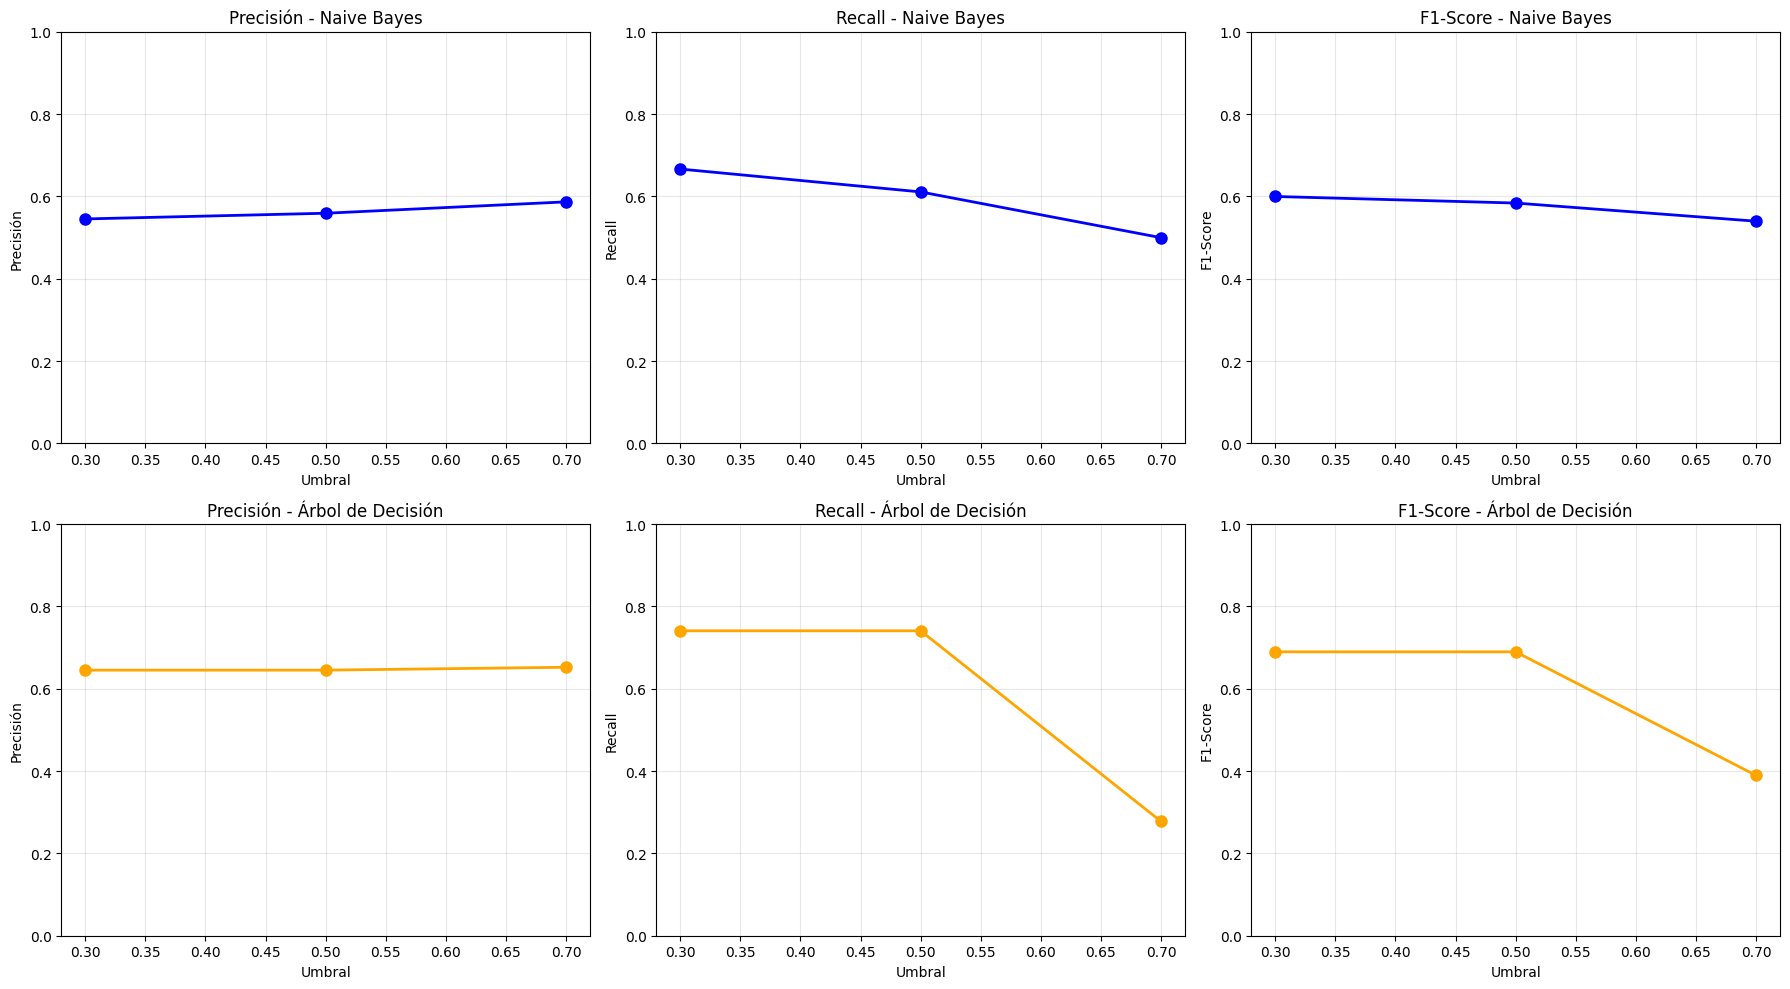

In [ ]:
# Crear gráficos para visualizar las métricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Definir colores para cada modelo
colores = {'Naive Bayes': 'blue', 'Árbol de Decisión': 'orange'}

# Gráficos para Naive Bayes
umbrales_nb = [r['umbral'] for r in resultados_nb]
precision_nb = [r['precision'] for r in resultados_nb]
recall_nb = [r['recall'] for r in resultados_nb]
f1_nb = [r['f1_score'] for r in resultados_nb]

axes[0,0].plot(umbrales_nb, precision_nb, 'o-', color='blue', linewidth=2, markersize=8)
axes[0,0].set_title('Precisión - Naive Bayes')
axes[0,0].set_xlabel('Umbral')
axes[0,0].set_ylabel('Precisión')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 1)

axes[0,1].plot(umbrales_nb, recall_nb, 'o-', color='blue', linewidth=2, markersize=8)
axes[0,1].set_title('Recall - Naive Bayes')
axes[0,1].set_xlabel('Umbral')
axes[0,1].set_ylabel('Recall')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_ylim(0, 1)

axes[0,2].plot(umbrales_nb, f1_nb, 'o-', color='blue', linewidth=2, markersize=8)
axes[0,2].set_title('F1-Score - Naive Bayes')
axes[0,2].set_xlabel('Umbral')
axes[0,2].set_ylabel('F1-Score')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].set_ylim(0, 1)

# Gráficos para Árbol de Decisión
umbrales_tree = [r['umbral'] for r in resultados_tree]
precision_tree = [r['precision'] for r in resultados_tree]
recall_tree = [r['recall'] for r in resultados_tree]
f1_tree = [r['f1_score'] for r in resultados_tree]

axes[1,0].plot(umbrales_tree, precision_tree, 'o-', color='orange', linewidth=2, markersize=8)
axes[1,0].set_title('Precisión - Árbol de Decisión')
axes[1,0].set_xlabel('Umbral')
axes[1,0].set_ylabel('Precisión')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_ylim(0, 1)

axes[1,1].plot(umbrales_tree, recall_tree, 'o-', color='orange', linewidth=2, markersize=8)
axes[1,1].set_title('Recall - Árbol de Decisión')
axes[1,1].set_xlabel('Umbral')
axes[1,1].set_ylabel('Recall')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_ylim(0, 1)

axes[1,2].plot(umbrales_tree, f1_tree, 'o-', color='orange', linewidth=2, markersize=8)
axes[1,2].set_title('F1-Score - Árbol de Decisión')
axes[1,2].set_xlabel('Umbral')
axes[1,2].set_ylabel('F1-Score')
axes[1,2].grid(True, alpha=0.3)
axes[1,2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Gráfico comparativo directo

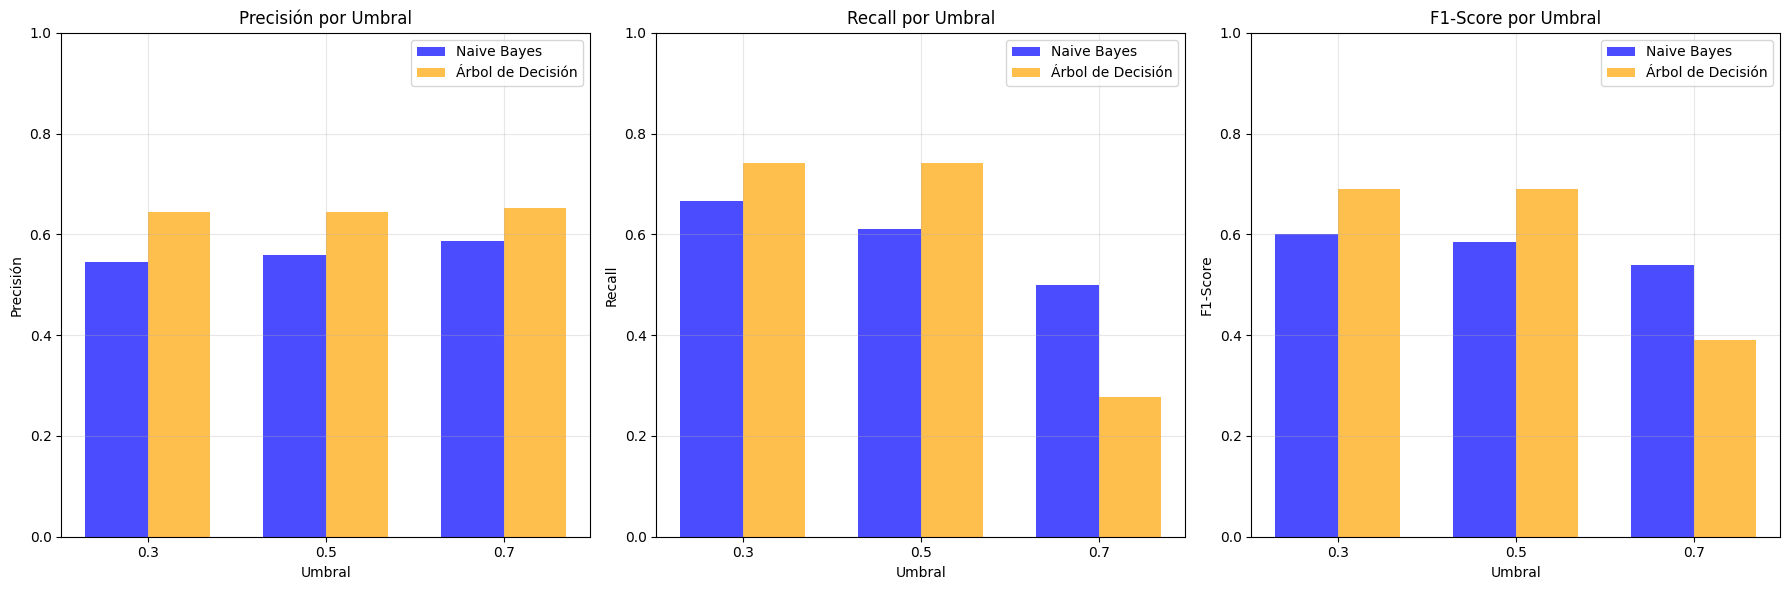

In [ ]:
# Gráfico comparativo lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

métricas = ['precision', 'recall', 'f1_score']
títulos = ['Precisión', 'Recall', 'F1-Score']

for i, (métrica, título) in enumerate(zip(métricas, títulos)):
    # Datos para Naive Bayes
    valores_nb = [r[métrica] for r in resultados_nb]
    valores_tree = [r[métrica] for r in resultados_tree]

    # Crear gráfico
    x_pos = np.arange(len(umbrales))
    width = 0.35

    axes[i].bar(x_pos - width/2, valores_nb, width, label='Naive Bayes',
                color='blue', alpha=0.7)
    axes[i].bar(x_pos + width/2, valores_tree, width, label='Árbol de Decisión',
                color='orange', alpha=0.7)

    axes[i].set_xlabel('Umbral')
    axes[i].set_ylabel(título)
    axes[i].set_title(f'{título} por Umbral')
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(umbrales)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Análisis médico y reflexiones

In [ ]:
print("\n🏥 ANÁLISIS PARA APLICACIÓN MÉDICA")
print("=" * 60)

print("🎯 CONTEXTO MÉDICO:")
print("   En diagnóstico de diabetes:")
print("   • FALSO NEGATIVO: No detectar diabetes = MUY GRAVE")
print("   • FALSO POSITIVO: Diagnosticar diabetes sin tenerla = Menos grave")
print("   • Por tanto: RECALL (sensibilidad) es MÁS IMPORTANTE que Precisión")

print(f"\n📊 ANÁLISIS POR UMBRAL:")

for umbral in umbrales:
    print(f"\nUMBRAL {umbral}:")

    # Buscar resultados para este umbral
    nb_result = next(r for r in resultados_nb if r['umbral'] == umbral)
    tree_result = next(r for r in resultados_tree if r['umbral'] == umbral)

    print(f"  Naive Bayes:")
    print(f"    Recall: {nb_result['recall']:.4f} (¿detecta bien la diabetes?)")
    print(f"    Precisión: {nb_result['precision']:.4f} (¿evita falsos positivos?)")
    print(f"    F1: {nb_result['f1_score']:.4f} (equilibrio general)")

    print(f"  Árbol de Decisión:")
    print(f"    Recall: {tree_result['recall']:.4f}")
    print(f"    Precisión: {tree_result['precision']:.4f}")
    print(f"    F1: {tree_result['f1_score']:.4f}")

    # Evaluación médica
    if umbral == 0.3:
        print("  💡 INTERPRETACIÓN: Umbral BAJO - Detecta más casos, más falsos positivos")
    elif umbral == 0.5:
        print("  💡 INTERPRETACIÓN: Umbral BALANCEADO - Equilibrio estándar")
    else:
        print("  💡 INTERPRETACIÓN: Umbral ALTO - Más conservador, puede perder casos")

print(f"\n🤔 REFLEXIÓN: ¿Cuál umbral es más apropiado para aplicación médica?")
print("-" * 70)

# Encontrar el mejor umbral basado en recall
mejor_recall_nb = max(resultados_nb, key=lambda x: x['recall'])
mejor_recall_tree = max(resultados_tree, key=lambda x: x['recall'])

print(f"🔍 ENFOQUE EN RECALL (detectar diabetes):")
print(f"  Naive Bayes: Mejor recall con umbral {mejor_recall_nb['umbral']} = {mejor_recall_nb['recall']:.4f}")
print(f"  Árbol: Mejor recall con umbral {mejor_recall_tree['umbral']} = {mejor_recall_tree['recall']:.4f}")

# Encontrar el mejor F1 (equilibrio)
mejor_f1_nb = max(resultados_nb, key=lambda x: x['f1_score'])
mejor_f1_tree = max(resultados_tree, key=lambda x: x['f1_score'])

print(f"\n⚖️ ENFOQUE EN EQUILIBRIO (F1-Score):")
print(f"  Naive Bayes: Mejor F1 con umbral {mejor_f1_nb['umbral']} = {mejor_f1_nb['f1_score']:.4f}")
print(f"  Árbol: Mejor F1 con umbral {mejor_f1_tree['umbral']} = {mejor_f1_tree['f1_score']:.4f}")

print(f"\n🏆 RECOMENDACIÓN MÉDICA:")
if mejor_recall_nb['umbral'] == 0.3:
    print(f"  ✅ UMBRAL 0.3 es preferible para aplicaciones médicas")
    print(f"     • Maximiza la detección de casos de diabetes")
    print(f"     • Los falsos positivos se pueden verificar con pruebas adicionales")
    print(f"     • Es preferible 'pecar de precavido' en medicina")
elif mejor_recall_nb['umbral'] == 0.5:
    print(f"  ⚖️ UMBRAL 0.5 ofrece un balance razonable")
    print(f"     • Buen equilibrio entre detección y precisión")
    print(f"     • Estándar en muchas aplicaciones")
else:
    print(f"  ⚠️ UMBRAL 0.7 puede ser demasiado conservador")
    print(f"     • Riesgo de perder casos de diabetes")
    print(f"     • No recomendado para screening médico")

print(f"\n💭 CONSIDERACIONES ADICIONALES:")
print(f"   • El umbral óptimo puede variar según la población")
print(f"   • Factores como edad, historial familiar, etc. pueden influir")
print(f"   • Siempre debe complementarse con juicio clínico")
print(f"   • Es preferible un sistema de alerta temprana (umbral bajo)")


🏥 ANÁLISIS PARA APLICACIÓN MÉDICA
🎯 CONTEXTO MÉDICO:
   En diagnóstico de diabetes:
   • FALSO NEGATIVO: No detectar diabetes = MUY GRAVE
   • FALSO POSITIVO: Diagnosticar diabetes sin tenerla = Menos grave
   • Por tanto: RECALL (sensibilidad) es MÁS IMPORTANTE que Precisión

📊 ANÁLISIS POR UMBRAL:

UMBRAL 0.3:
  Naive Bayes:
    Recall: 0.6667 (¿detecta bien la diabetes?)
    Precisión: 0.5455 (¿evita falsos positivos?)
    F1: 0.6000 (equilibrio general)
  Árbol de Decisión:
    Recall: 0.7407
    Precisión: 0.6452
    F1: 0.6897
  💡 INTERPRETACIÓN: Umbral BAJO - Detecta más casos, más falsos positivos

UMBRAL 0.5:
  Naive Bayes:
    Recall: 0.6111 (¿detecta bien la diabetes?)
    Precisión: 0.5593 (¿evita falsos positivos?)
    F1: 0.5841 (equilibrio general)
  Árbol de Decisión:
    Recall: 0.7407
    Precisión: 0.6452
    F1: 0.6897
  💡 INTERPRETACIÓN: Umbral BALANCEADO - Equilibrio estándar

UMBRAL 0.7:
  Naive Bayes:
    Recall: 0.5000 (¿detecta bien la diabetes?)
    Precisió

# Actividad 4: Análisis de Importancia de Atributos

- Para Árbol de Decisión

Extrae la importancia de atributos (`model.feature_importances_`).

In [14]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Variables predictoras y objetivo
X = df.drop(columns='Outcome')
y = df['Outcome']

# Modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)

# Importancia de atributos
importances = tree_model.feature_importances_

# Crear DataFrame con importancia
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)



Visualiza con un gráfico de barras.

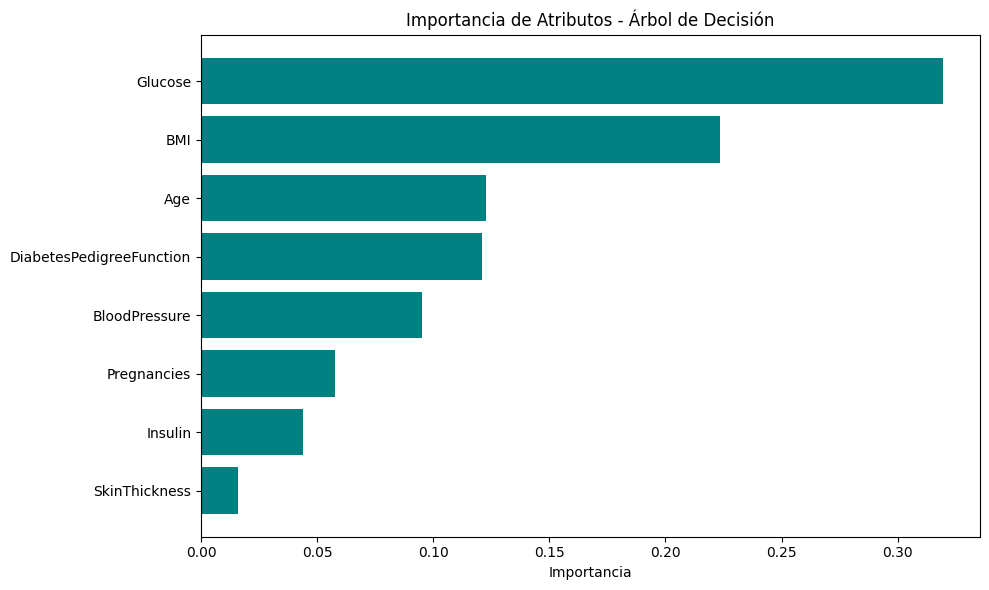

In [15]:
# Gráfico
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de Atributos - Árbol de Decisión')
plt.tight_layout()
plt.show()


- Las variables que más influyen en las decisiones del modelo son:

**Glucosa** (32%) es el predictor más importante, seguida por **BMI** (22%) y **Edad** (12%). Estas tres variables concentran el 66% de la importancia total del modelo.

Las variables secundarias incluyen **DiabetesPedigreeFunction**, **BloodPressure**, **Pregnancies** e **Insulin** con importancias entre 4-12%, mientras que **SkinThickness** presenta la menor influencia con solo 1%.

El modelo prioriza claramente los indicadores metabólicos directos sobre otros factores demográficos y clínicos.

- Para Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

# Modelo
nb_model = GaussianNB()
nb_model.fit(X, y)

# Medias y varianzas por clase
medias = pd.DataFrame(nb_model.theta_, columns=X.columns)
varianzas = pd.DataFrame(nb_model.var_, columns=X.columns)

# Añadir clases
medias['Clase'] = nb_model.classes_
varianzas['Clase'] = nb_model.classes_

# Mostrar resultados
print("📊 Medias por clase:")
print(medias.set_index('Clase'))

print("\n📊 Varianzas por clase:")
print(varianzas.set_index('Clase'))


📊 Medias por clase:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Clase                                                                      
0         3.298000  109.980000      68.184000      19.664000   68.792000   
1         4.865672  141.257463      70.824627      22.164179  100.335821   

             BMI  DiabetesPedigreeFunction        Age  
Clase                                                  
0      30.304200                  0.429734  31.190000  
1      35.142537                  0.550500  37.067164  

📊 Varianzas por clase:
       Pregnancies      Glucose  BloodPressure  SkinThickness       Insulin  \
Clase                                                                         
0         9.085209   681.995613     325.622157     221.267117   9754.796749   
1        13.944656  1016.332980     460.174481     311.405894  19162.902163   

             BMI  DiabetesPedigreeFunction         Age  
Clase                                                